In [148]:
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

#클러스터링 관련 참조
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.spatial import ConvexHull

#Elbow Point 계산 라이브러리
from kneed import KneeLocator

my_dpi =200

In [149]:
origin = load_data("iris")
origin.head()

[data] https://data.hossam.kr/kaggle/iris.xlsx
[desc] 1936년 영국의 통계학자 로널드 피셔(Ronald A. Fisher)가 소개한 3가지 품종(setosa, versicolor, virginica)의 붓꽃(Iris)에 대한 꽃받침과 꽃잎의 길이와 너비 측정값으로 구성된 유명한 머신러닝 및 데이터 분석용 데이터셋.(출처: Kaggle)

field         description
------------  -------------
Sepal.Length  꽃밭침 길이
Sepal.Width   꽃밭침 너비
Petal.Length  꽃잎 길이
Petal.Width   꽃잎 너비
Species       품종



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [150]:
df = origin.drop("Species", axis=1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [151]:
klist = list(range(2,11))
inertia = []

for k in klist:
    estimator = KMeans(n_clusters=k, random_state=0)
    estimator.fit(X=df)
    inertia.append(estimator.inertia_)

inertia

[152.34795176035792,
 78.85566582597731,
 57.228473214285714,
 49.82774055829229,
 42.42154575309748,
 34.420191786283894,
 30.064593073593073,
 28.715856536394462,
 27.462118791296422]

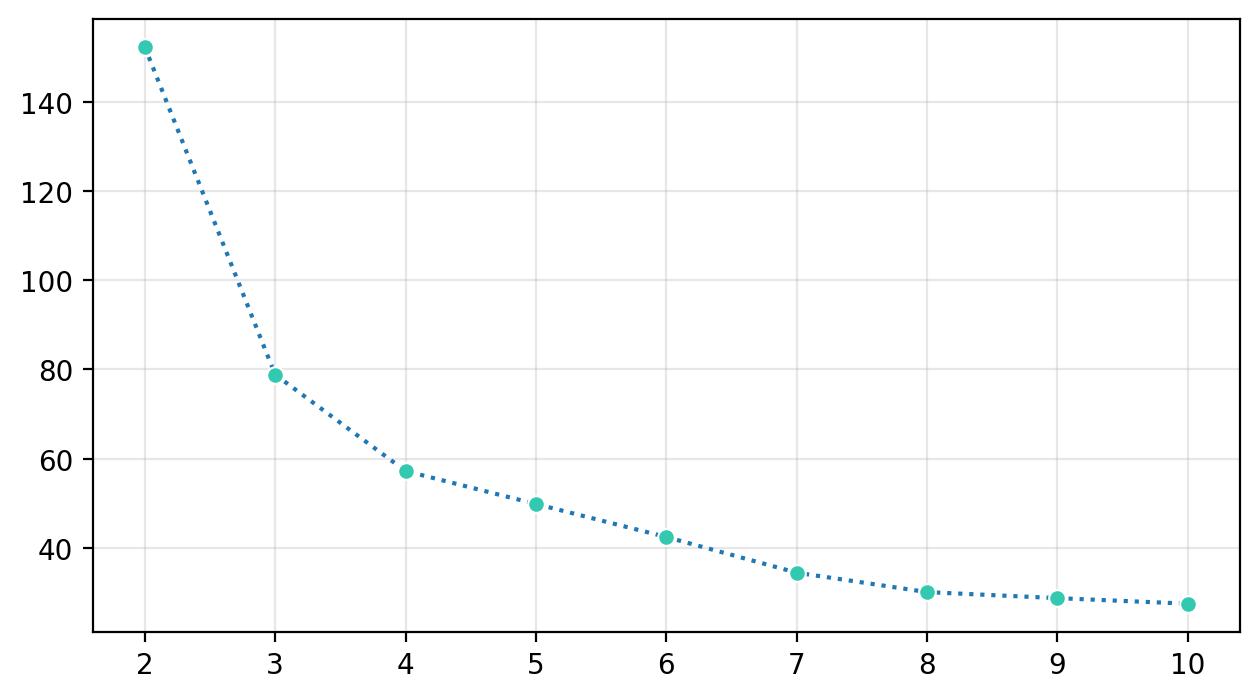

In [152]:
figsize = (1280/my_dpi, 720/my_dpi)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, dpi=my_dpi)

sb.lineplot(
    x=klist,
    y=inertia,
    linestyle=":",
    marker="o",
    markerfacecolor="#32c9b0",
    markeredgecolor="#ffffff"
)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

x축의 값이 4인 지점부터 감소가 완만하게 진행되는 것으로 보인다.
그러므로 최적의 클러스터 수는 3으로 판단할 수 있다.

In [153]:
slope_list = [0]

for i in range(1, len(inertia)):
    x1 = klist[i-1]
    y1 = inertia[i-1]
    x2 = klist[i]
    y2 = inertia[i]

    slope, _ = np.polyfit([x1, x2], [y1, y2],1)
    slope_list.append(slope)

slope_list

[0,
 np.float64(-73.4922859343805),
 np.float64(-21.62719261169159),
 np.float64(-7.4007326559934485),
 np.float64(-7.406194805194824),
 np.float64(-8.001353966813582),
 np.float64(-4.355598712690802),
 np.float64(-1.3487365371986073),
 np.float64(-1.2537377450980371)]

In [154]:
avg_slope = np.mean(slope_list)
avg_slope

np.float64(-13.876203663229042)

In [155]:
ev = []
ei = []
for i,v in enumerate(slope_list):
    if v<avg_slope:
        ev.append(v)
        ei.append(i)

elbow_point = ei[np.argmax(ev)]
elbow_point

2

In [156]:
best_k = klist[elbow_point]
best_k

4

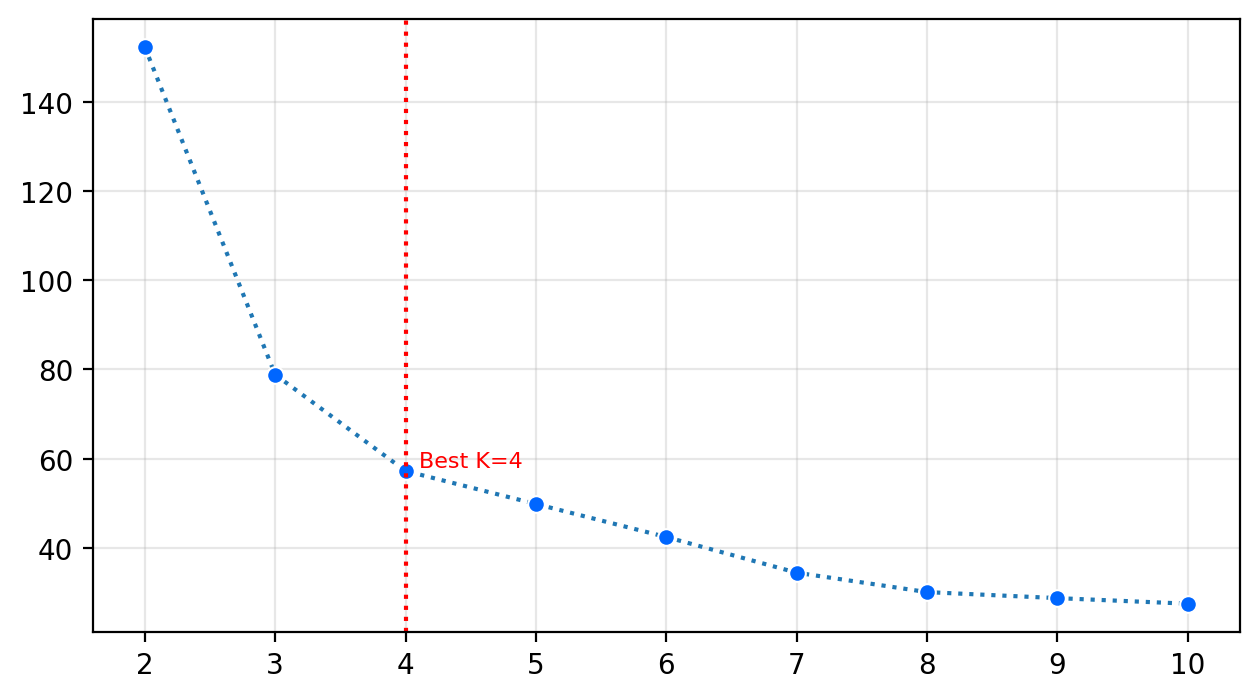

In [157]:
figsize = (1280/ my_dpi, 720/my_dpi)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, dpi = my_dpi)

sb.lineplot(
    x=klist,
    y=inertia,
    linestyle = ":",
    marker="o",
    markerfacecolor="#0066ff",
    markeredgecolor="#ffffff",
)

#엘보우 포인트 표시
ax.axvline(x=best_k, color="red", linestyle=":")
ax.text(
    best_k +0.1,
    inertia[elbow_point]+0.1,
    "Best K=%d" % best_k,
    fontsize=8,
    ha="left",
    va="bottom",
    color="r",)

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

In [158]:
k1 = KneeLocator(klist, inertia, curve="convex", direction="decreasing")
best_k = k1.elbow
best_y= k1.elbow_y
print("found elbow: ", best_k)
print("found y:", best_y)


found elbow:  4
found y: 57.228473214285714


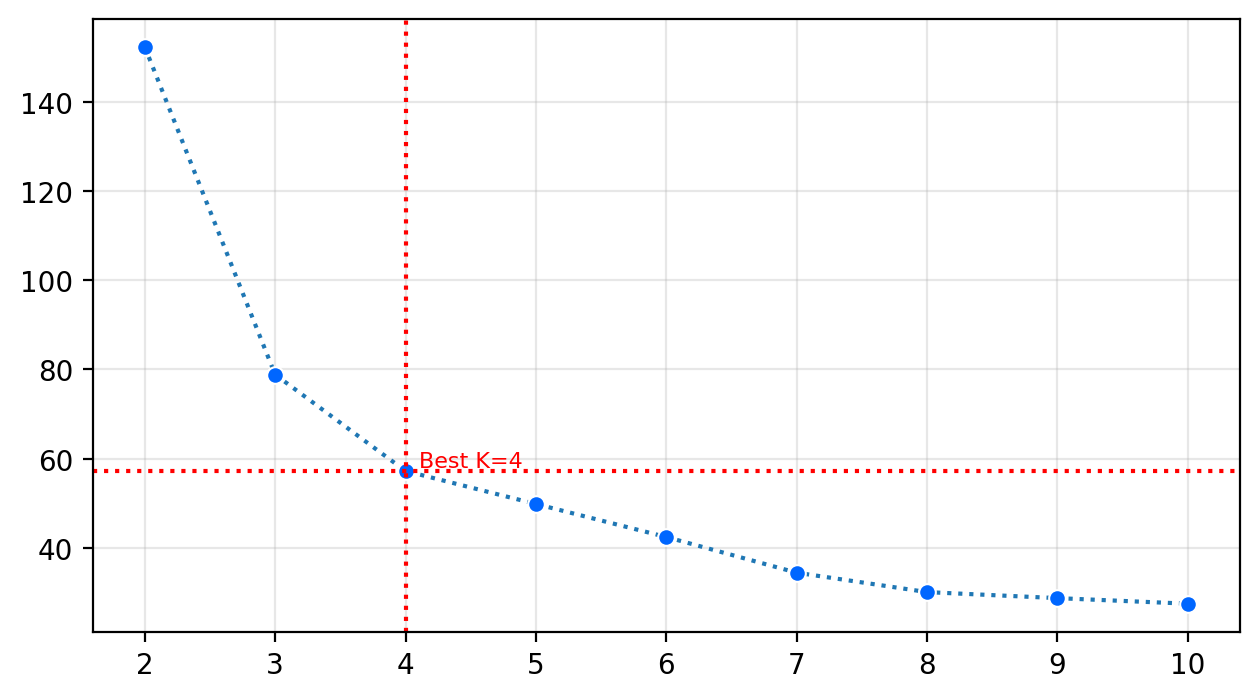

In [159]:
figsize = (1280/ my_dpi, 720/my_dpi)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize, dpi = my_dpi)

sb.lineplot(
    x=klist,
    y=inertia,
    linestyle = ":",
    marker="o",
    markerfacecolor="#0066ff",
    markeredgecolor="#ffffff",
)

#엘보우 포인트 표시
ax.axvline(x=best_k, color="red", linestyle=":")
ax.axhline(y=best_y, color="red", linestyle=":")
ax.text(
    best_k +0.1,
    inertia[elbow_point]+0.1,
    "Best K=%d" % best_k,
    fontsize=8,
    ha="left",
    va="bottom",
    color="r",)

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

In [160]:
estimator = KMeans(n_clusters=best_k) #모델 객체 생성
estimator.fit(df)                     # 모델 학습
cluster = estimator.predict(df)       #예측
df["ClusterID"] = cluster
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,ClusterID
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


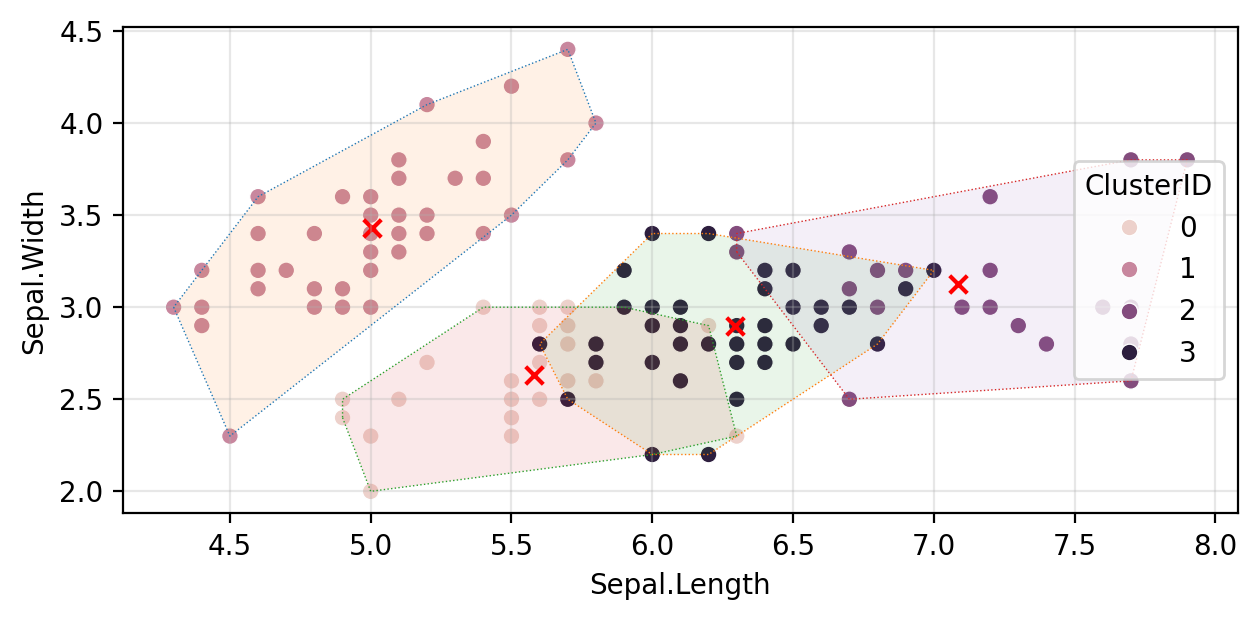

In [161]:
vdf = df.copy()
hue_field = "ClusterID"
x_field = "Sepal.Length"
y_field = "Sepal.Width"

width_px = 1280
height_px = 640
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

#데이터 산점도
sb.scatterplot(data=vdf, x= x_field,y=y_field, hue=hue_field)

#군집별, 값의 종류별로 반복
for c in vdf[hue_field].unique():
    #값의 종류별로 데이터프레임을 나눔
    df_c = vdf.loc[vdf[hue_field]==c, [x_field, y_field]]

    try:
        hull = ConvexHull(df_c)  #마지막 좌표 이후에 첫 번째 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])  #시작점과 끝점을 연결
        ax.plot(
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth=0.5,linestyle=":"
        )
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)
    except:
        pass

# 군집별 중심점 표시
ax.scatter(
    estimator.cluster_centers_[:, 0],
    estimator.cluster_centers_[:, 1],
    marker="x",
    c="red",
    alpha=1,
    s=40,
)
ax.grid(True,alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()